# Staircase Image Classifier - Brandon Tang & Reiden Ong

## Importing Libraries and Model

In [1]:
import tensorflow as tf, numpy as np, keras, cv2, matplotlib.pyplot as plt, json, os
from skimage import io
from subprocess import call
from tqdm import tqdm
IMG_SIZE = 299
class_names = ["curved_left", "curved_right", "negative", "straight"]
wpath = "model_weights" #weights path


print("Loading Model, This might take some time...")
# Loading Model architecture via JSON
with open('arc.json') as f:
    data_str = json.load(f)
model = keras.models.model_from_json(data_str)

# Loading model weights from binary .npy files
weights = []
for filename in tqdm(sorted(os.listdir(wpath))):      
    weights.append(np.load(wpath+"/" +filename))

# Set weights
print("Setting weights..")
model.set_weights(weights)

model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

print("Model Loaded")

Using TensorFlow backend.


Loading Model, This might take some time...


100%|██████████| 900/900 [00:00<00:00, 3249.49it/s]


Setting weights..
Model Loaded


## Functions for Predictions

In [2]:
def predict(img_array):  #nxnxc input (channels last) datatype = int
    try: #Some image will already come as greyscale
        img_array = np.array([np.average(i,1) for i in img_array]) #Convert to greyscale
    except:
        pass
    
    img = img_array/255.0

    img_display  = img.astype("float32")
    img = np.resize(img,(IMG_SIZE, IMG_SIZE, 1))
    #print("img shape:", img.shape)
    plt.imshow(img_display, cmap ='gray')
    plt.show()
    prediction = model.predict(np.asarray([img]))[0]
    print("Classes:      Curved Left    Curved Right    Negative     Straight")
    print("Prediction:", prediction, "Class:", class_names[np.argmax(prediction)])
    return class_names[np.argmax(prediction)]

def url_to_img(url):
    print ("downloading "+url)
    image = io.imread(url)
 
    return image

def predict_local(img_path="prediction/2.jpg"):
    img_array = cv2.imread(img_path)  # Convert to array
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
    class_name = predict(img_array)
    return class_name

def predict_web(url):
    img_array = url_to_img(url)
    #print("Web Image Shape:", img_array.shape)
    img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    
    class_name = predict(img_array)
    return class_name

## Predictions
### Predict Image From Online URL

downloading https://i.imgur.com/Yzgh3MB.jpg


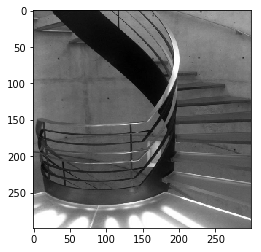

Classes:      Curved Left    Curved Right    Negative     Straight
Prediction: [9.9992204e-01 7.7344281e-05 2.1428333e-08 5.3027458e-07] Class: curved_left


'curved_left'

In [3]:
url = "https://i.imgur.com/Yzgh3MB.jpg"
predict_web(url)

### Predict Image from Local Storage

In [4]:
print("Choose images from here :)")
!ls prediction

Choose images from here :)
1.jpeg	1.jpg  2.jpeg  2.jpg  3.jpeg  4.jpeg  4.jpg  5.jpg  6.jpg  7.jpg


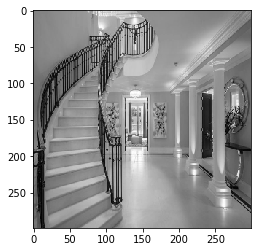

Classes:      Curved Left    Curved Right    Negative     Straight
Prediction: [2.6839296e-03 9.9730742e-01 5.5186581e-07 8.1744283e-06] Class: curved_right


'curved_right'

In [5]:
predict_local(img_path="prediction/4.jpeg")